In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from types import SimpleNamespace
from pathlib import Path
sns.set(style='ticks', context='talk')
cmap = mpl.cm.get_cmap('vlag').copy()
cmap.set_bad(color='white')
figure_path = Path('..') / 'figures'

/tmp/ipykernel_5939/2456099322.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('vlag').copy()


In [9]:
df = pd.read_csv(Path('../scores/matrix_comparisons.csv'))

matrix_path = Path('../matrices/N100x0+-1_hub10x3+-1')
matrix_a = np.load(matrix_path / '0.npy')
matrix_b = np.load(matrix_path / '1.npy')
df

,Unnamed: 0,N,bkgr_mean,bkgr_var,hub_size,hub_mean,hub_var,seed_a,seed_b,score
0,0,100,0.0,1.0,2,0.5,1.0,0,1,0.034847
1,1,100,0.0,1.0,2,0.5,1.0,0,2,0.036020
2,2,100,0.0,1.0,2,0.5,1.0,0,3,0.040563
3,3,100,0.0,1.0,2,0.5,1.0,0,4,0.037335
4,4,100,0.0,1.0,2,0.5,1.0,0,5,0.038493
...,...,...,...,...,...,...,...,...,...,...
2195,2195,100,0.0,1.0,10,4.0,1.0,7,9,0.067038
2196,2196,100,0.0,1.0,10,4.0,1.0,7,10,0.069578
2197,2197,100,0.0,1.0,10,4.0,1.0,8,9,0.072987
2198,2198,100,0.0,1.0,10,4.0,1.0,8,10,0.067447


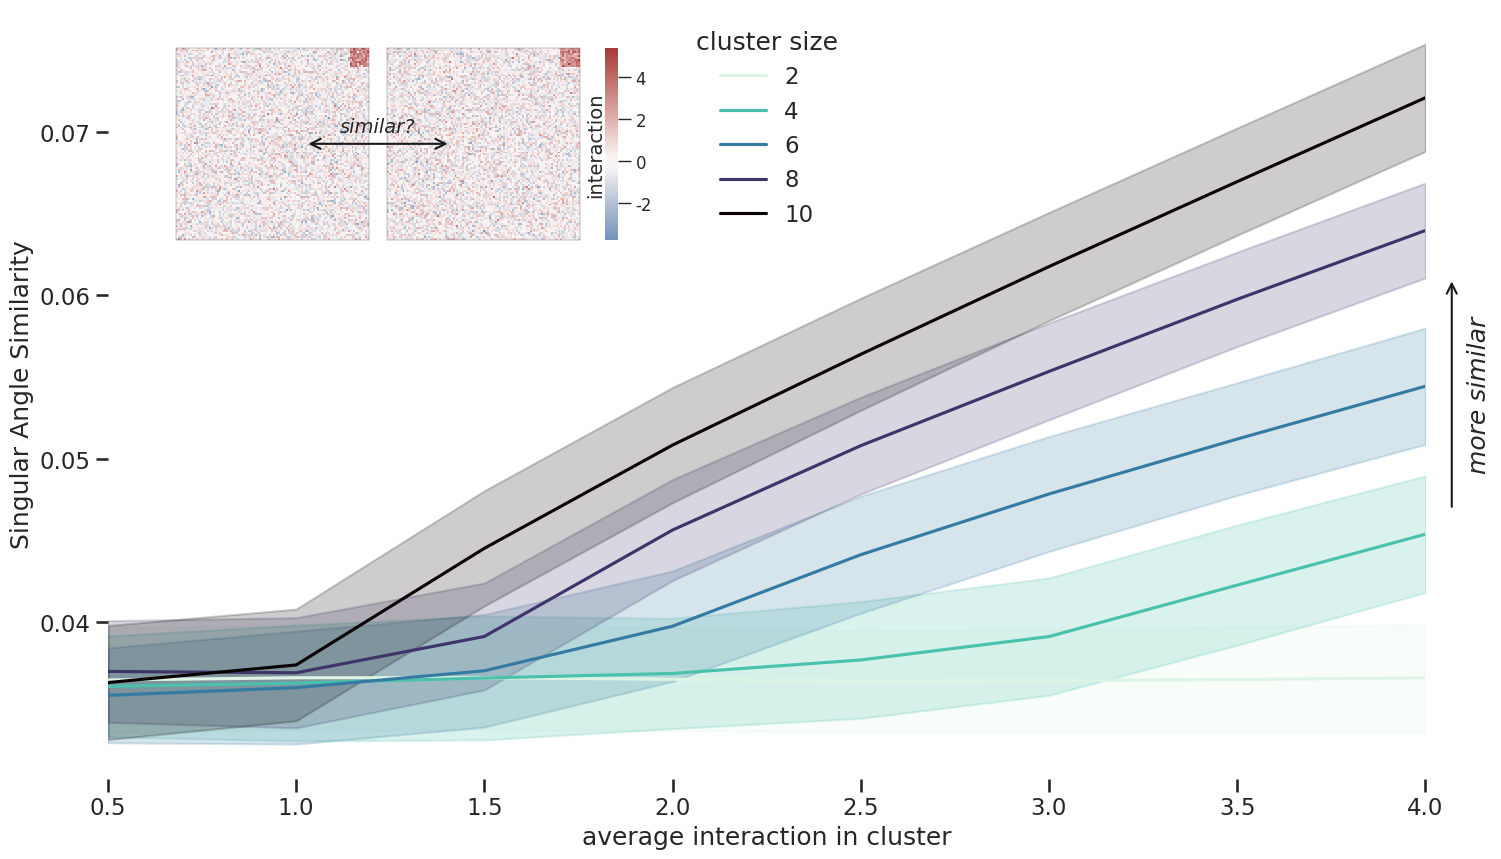

In [10]:
fig, ax = plt.subplots(figsize=(17,10))

# line trends
sns.lineplot(data=df, x="hub_mean", y="score", hue="hub_size", 
             estimator=np.mean, errorbar=('sd'), palette='mako_r')
ax.set_ylabel('Singular Angle Similarity')
ax.set_xlabel('average interaction in cluster')
ax.legend(title="cluster size", frameon=False, loc='upper center')
# ax.set_yscale('log')
# ax.set_ylim((10e-6,1))
ax.set_xlim((df.hub_mean.min(), df.hub_mean.max()))
ax.set_xticks(df.hub_mean.unique())

# correlation matrices
x1, x2 = .0, .16
y = .7
w, h = .25, .25
axin1 = ax.inset_axes([x1, y, w, h], transform=ax.transAxes)
axin2 = ax.inset_axes([x2, y, w, h], transform=ax.transAxes)
axin3 = ax.inset_axes([(x2+w)*.92, y, 0.01, h], transform=ax.transAxes)
vmin = np.min([np.min(matrix_a), np.min(matrix_b)])
vmax = np.max([np.max(matrix_a), np.max(matrix_b)])

sns.heatmap(matrix_a, cmap=cmap, vmin=vmin, vmax=vmax, center=0, square=True, 
            ax=axin1, cbar=False, rasterized=True)
sns.heatmap(matrix_b, cmap=cmap, vmin=vmin, vmax=vmax, center=0, square=True, 
            ax=axin2, cbar=True, rasterized=True, cbar_ax=axin3)

axin3.tick_params(width=1, labelsize=12)
axin3.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))
axin3.set_ylabel('interaction', fontsize=14, labelpad=0, zorder=15)
axin3.yaxis.set_label_position('left')

for axi in [axin1, axin2]:
    axi.set_xticks([])
    axi.set_yticks([])
    sns.despine(right=False, top=False, ax=axi)
    for spine in ['top', 'bottom', 'left', 'right']:
        axi.spines[spine].set_linewidth(.2)  
#         axi.spines[spine].set_linestyle((0,(5,5))) 
        
# text annotation
al = .1 # arrow length
ay = y + h/2 # arrow y
ax.annotate(xy=(x1+w-al,ay), xytext=(x2+al,ay), text='', xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->', color='k'), zorder=100)
ax.text(s='similar?', x=(x1+x2+w)/2, y=ay+.01, ha='center', va='bottom', 
        transform=ax.transAxes, zorder=100, fontsize=14, fontstyle='italic')
#         bbox=dict(facecolor='white', alpha=0.8))

# more similar
x = 1.02
y0, y1 = .35, .65
ax.annotate(xy=(x,y0), xytext=(x,y1), text='', xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<-', color='k'))
ax.text(s='more similar', x=x+.03, y=(y0+y1)/2, ha='right', va='center', 
        transform=ax.transAxes, fontsize=18, rotation=90, fontstyle='italic')

sns.despine(ax=ax, left=True, bottom=True)
plt.savefig(figure_path / 'calibrate_clustered_matrix_similarity.pdf', dpi=300, bbox_inches='tight')